# Zaneta Fransiske - 2702312146
## Case 3B (Restaurant Recommendation)

<span style="color: red; font-size: 19px;"> A. Exploratory Data Analysis (EDA)</span>


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('C:/COOLYEAH/UAS ML/3B.tsv', delimiter ="\t")

df.head()

,url,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),sell_beverages,sell_chinese_food,sell_thai_food,sell_indian_food,sell_mediterranean_food,sell_fast_food,sell_desserts
0,https://www.zomato.com/bangalore/faasos-1-vasa...,Faasos,Yes,No,3.8,101,Vasanth Nagar,Delivery,"North Indian, Biryani, Fast Food",500,Delivery,no,no,no,yes,no,yes,no
1,https://www.zomato.com/bangalore/khanapur-expr...,Khanapur Express,No,No,NaN,0,JP Nagar,Quick Bites,"North Indian, Rajasthani",500,Delivery,no,no,no,yes,no,no,no
2,https://www.zomato.com/bangalore/russh-gastrop...,Russh Gastropub,No,No,4.2,1279,Church Street,Pub,"Continental, Italian, Burger","1,100",Drinks & nightlife,no,no,no,no,no,yes,no
3,https://www.zomato.com/bangalore/bangalir-rann...,Bangalir Rannaghar,No,No,2.9,58,Bannerghatta Road,Quick Bites,"Bengali, North Indian, Chinese",250,Dine-out,no,yes,no,yes,no,no,no
4,https://www.zomato.com/bangalore/natural-mumba...,Natural Mumbai Kulfi,Yes,No,3.5,8,BTM,Dessert Parlor,Ice Cream,130,Delivery,no,no,no,no,no,no,yes


In [2]:
df.tail()

,url,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),sell_beverages,sell_chinese_food,sell_thai_food,sell_indian_food,sell_mediterranean_food,sell_fast_food,sell_desserts
14995,https://www.zomato.com/bangalore/sri-vasavi-re...,Sri Vasavi Restaurant,No,No,3.6,30,Bellandur,Quick Bites,"Chinese, Biryani",250,Delivery,no,yes,no,yes,no,no,no
14996,https://www.zomato.com/bangalore/hoppipola-chu...,Hoppipola,Yes,No,4.3,1708,Church Street,Lounge,"Continental, Mediterranean, European","1,300",Delivery,no,no,no,no,yes,no,no
14997,https://www.zomato.com/bangalore/ghar-ki-rasoi...,Ghar Ki Rasoi,Yes,No,3.7,50,Bellandur,Casual Dining,North Indian,500,Delivery,no,no,no,yes,no,no,no
14998,https://www.zomato.com/bangalore/ice-cubes-ind...,Ice Cubes,No,No,3.0,16,Indiranagar,Quick Bites,"Fast Food, Desserts, Beverages",300,Dine-out,yes,no,no,no,no,yes,yes
14999,https://www.zomato.com/bangalore/krispy-kreme-...,Krispy Kreme,Yes,No,4.0,253,Jayanagar,Dessert Parlor,"Desserts, Beverages",300,Delivery,yes,no,no,no,no,no,yes


In [3]:
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

Number of rows: 15000
Number of columns: 18


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          15000 non-null  object
 1   name                         15000 non-null  object
 2   online_order                 15000 non-null  object
 3   book_table                   15000 non-null  object
 4   rate                         12736 non-null  object
 5   votes                        15000 non-null  int64 
 6   location                     14992 non-null  object
 7   rest_type                    14931 non-null  object
 8   cuisines                     14988 non-null  object
 9   approx_cost(for two people)  14908 non-null  object
 10  listed_in(type)              15000 non-null  object
 11  sell_beverages               14988 non-null  object
 12  sell_chinese_food            14988 non-null  object
 13  sell_thai_food               14

In [5]:
df.describe()

,votes
count,15000.000000
mean,285.355000
std,812.512684
min,-1.000000
25%,7.000000
50%,39.000000
75%,197.000000
max,16832.000000


#### Check Duplicated Data

In [6]:
duplicates = df[df.duplicated()]

print(duplicates)

Empty DataFrame
Columns: [url, name, online_order, book_table, rate, votes, location, rest_type, cuisines, approx_cost(for two people), listed_in(type), sell_beverages, sell_chinese_food, sell_thai_food, sell_indian_food, sell_mediterranean_food, sell_fast_food, sell_desserts]
Index: []


#### Check Missing Value

In [7]:
missing_values = df.isnull().sum()
print("\nMissing Values in Each Column:")
print(missing_values)


Missing Values in Each Column:
url                               0
name                              0
online_order                      0
book_table                        0
rate                           2264
votes                             0
location                          8
rest_type                        69
cuisines                         12
approx_cost(for two people)      92
listed_in(type)                   0
sell_beverages                   12
sell_chinese_food                12
sell_thai_food                   12
sell_indian_food                 12
sell_mediterranean_food          12
sell_fast_food                   12
sell_desserts                    12
dtype: int64


#### Checking Unique Value

In [9]:
for c in df.columns:
  if df[c].dtype == 'object':
    print("\n")
    print(df[c].value_counts())



url
https://www.zomato.com/bangalore/faasos-1-vasanth-nagar?context=eyJzZSI6eyJlIjpbIjE4MzEzNTQyIiwiMTg0MzU2ODgiLCIxODYyNDg5OCIsIjE4NzQwOTQxIiwxODQwNzkxOSwiMTg3OTY3NDUiLCIxODczNTIyOCIsIjU3MjI1IiwiMTg3NDExMTIiLCI1Nzg5MCIsIjE4ODEzMDMwIiwiMTgwMjIyOTMiLCIxODU3OTQ3MCIsIjU0Mjk3IiwiNjExNzIiXSwidCI6IkRlbGl2ZXJ5IFJlc3RhdXJhbnRzIGluIEJUTSJ9fQ==                                                                                                                                    1
https://www.zomato.com/bangalore/kevins-kitchen-koramangala-6th-block-bangalore?context=eyJzZSI6eyJlIjpbIjE4MjA4MzY2IiwiMTg2Njc0NzciLCIxODg4OTkyMyIsIjUzMjg0Iiw1NTYzOSwiNTQ2MTUiLCI1MTAwNyIsIjE4NjU4MzMyIiwiMTgyNTQ2MDAiLCIxODcwNzU4NSIsIjUyMjgxIiwiMTg4NTk2NTIiLCI1ODUzMiIsIjE4NTY2NzEzIiwiNTA2MzQiLCI1MDU4NyIsIjE4ODY1NzA5IiwiMTg2MjYwMjIiLCIxODYzOTY3OSIsIjE4NzE1MTEzIiwiNTEzMzIiLCI1ODQzNCIsIjE4ODkzNzY4Il0sInQiOiJEZWxpdmVyeSBSZXN0YXVyYW50cyBpbiBJbmRpcmFuYWdhciJ9fQ==    1
https://www.zomato.com/bangalore/atithi-hsr?context=eyJzZSI6ey

#### Boxplot For Checking Outlier Numerical Data

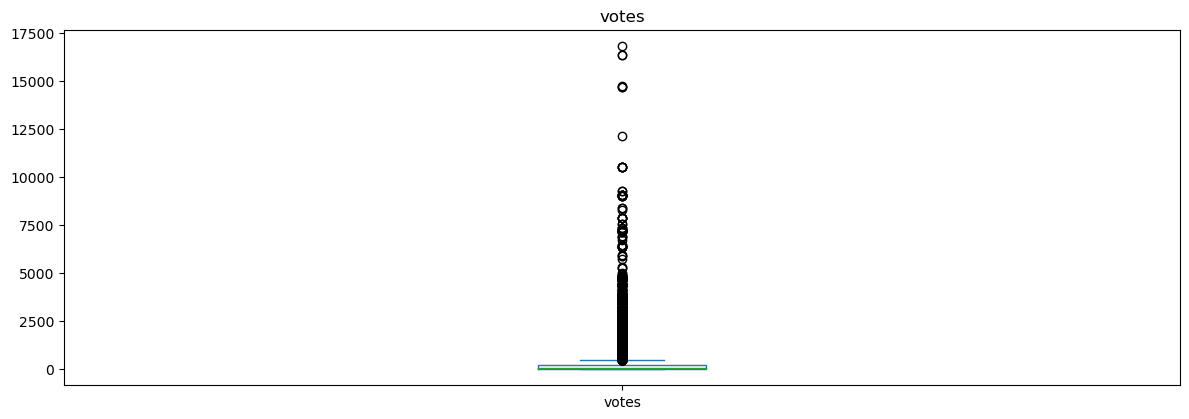

In [8]:
c = ['votes']
plt.figure(figsize=(12, 8))
for i, col in enumerate(c, 1):
    plt.subplot(2, (len(c) + 1) // 2, i)
    df[col].plot.box()
    plt.title(col)
plt.tight_layout()
plt.show()

#### Check Outlier With Interquantile Range (IQR)

In [9]:
outliers = {}

for col in c:
    Q1 = df[col].quantile(0.25)  
    Q3 = df[col].quantile(0.75)  
    IQR = Q3 - Q1                
    lower_bound = Q1 - 1.5 * IQR 
    upper_bound = Q3 + 1.5 * IQR 

    outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

for col, data in outliers.items():
    print(f"Outliers in column {col}:")
    print(data)
    print("\n")

Outliers in column votes:
                                                     url  \
2      https://www.zomato.com/bangalore/russh-gastrop...   
7      https://www.zomato.com/bangalore/ciclo-cafe-in...   
20     https://www.zomato.com/bangalore/puchkas-marat...   
26     https://www.zomato.com/bangalore/infinitea-tea...   
28     https://www.zomato.com/bangalore/third-wave-co...   
...                                                  ...   
14969  https://www.zomato.com/bangalore/green-theory-...   
14971  https://www.zomato.com/bangalore/skyye-lavelle...   
14984  https://www.zomato.com/bangalore/cable-car-jay...   
14987  https://www.zomato.com/bangalore/sotally-tober...   
14996  https://www.zomato.com/bangalore/hoppipola-chu...   

                                 name online_order book_table  rate  votes  \
2                     Russh Gastropub           No         No   4.2   1279   
7                          Ciclo Cafe          Yes         No   4.3   1273   
20                 

#### Check Data Distribution

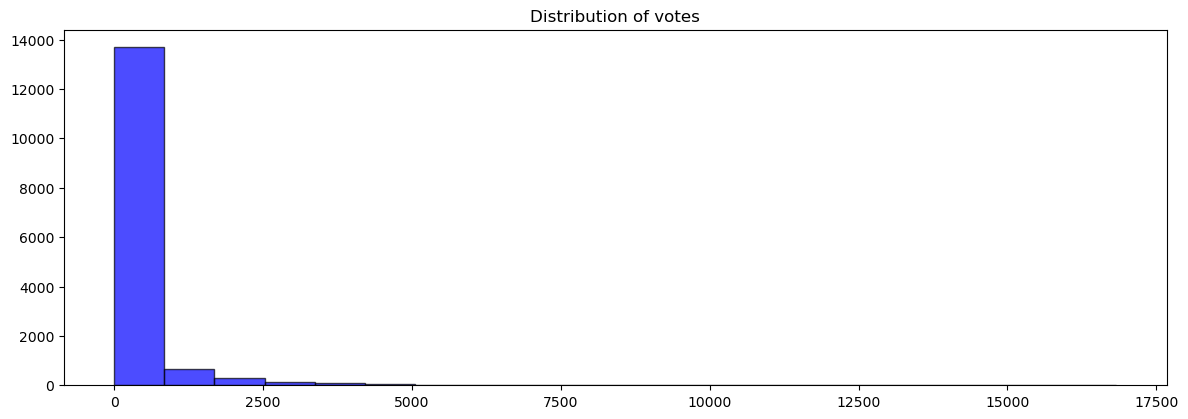

In [10]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(c, 1):
    plt.subplot(2, (len(c) + 1) // 2, i)
    plt.hist(df[col], bins=20, color='blue', edgecolor='black', alpha=0.7)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

#### Skewness

In [11]:
from scipy.stats import skew
for col in c:
    print(f"Skewness of {col}: {skew(df[col])}")

Skewness of votes: 7.667249882427981


### EDA Result
#### Based on the Exploratory Data Analysis (EDA) results, here are the key findings from the dataset:
- There are 15000 rows of data and 18 columns of data.
- Primary restaurant data includes features like names, locations, cuisines, and customer ratings

Data Type
- The rate column is currently in 'object' dtype instead of the expected 'float64'
- The approx_cost(for two people) column is currently in 'object' dtype instead of the expected 'float64'

Duplicate Data
- There are no duplicate entries in the dataset

Missing Values 
- 2264 missing values in rate column
- 8 missing values in location column
- 69 missing values in rest_type column
- 12 missing values cuisines column
- 92 missing values in approx_cost(for two people) column
- 12 missing value in sell_beverages column                  
- 12 missing value in sell_chinese_food column               
- 12 missing value in sell_thai_food column                  
- 12 missing value in sell_indian_food column                
- 12 missing value in sell_mediterranean_food column        
- 12 missing value in sell_fast_food column                  
- 12 missing value in sell_desserts column                   
- Some columns have no missing values (url, name, online_order, book_table, listed_in(type))

Outliers:
     
    Votes
    - Highly skewed distribution (skewness: 7.67)
    - Many outliers present in the votes column
    - Most restaurants have relatively few votes
    - Some restaurants have extremely high vote counts (up to ~15,000)

Restaurant Characteristics

    Most common restaurant types:
    Quick Bites (5,516)
    Casual Dining (2,967)
    Cafe (1,115)
    Delivery (781)
    Dessert Parlor (642)

Services and Features

    Online Ordering:
    Yes: 8,850 restaurants
    No: 6,150 restaurants


    Table Booking:
    No: 13,127 restaurants
    Yes: 1,873 restaurants

Cuisine Analysis

    Popular cuisines:

    North Indian (863)
    North Indian, Chinese (682)
    South Indian (514)
    Biryani (248)
    Bakery, Desserts (244)

Location Distribution

    Top locations:

    BTM (1,483)
    HSR (759)
    Koramangala 5th Block (697)
    JP Nagar (647)
    Whitefield (619)

Cost Analysis

    Most common price ranges (for two people):
    ₹300 (2,248 restaurants)
    ₹400 (1,914 restaurants)
    ₹500 (1,417 restaurants)
    ₹200 (1,401 restaurants)

Restaurant Categories

    Main categories:
    Delivery (7,527)
    Dine-out (5,210)
    Desserts (998)
    Cafes (517)
    Drinks & nightlife (300)

Food Type Distribution

    Indian food: 8,046 serve, 6,942 don't
    Chinese food: 4,474 serve, 10,514 don't
    Thai food: 569 serve, 14,419 don't
    Mediterranean food: 167 serve, 14,821 don't
    Fast food: 3,085 serve, 11,903 don't
    Desserts: 1,810 serve, 13,178 don't
    Beverages: 3,015 serve, 11,973 don't

<span style="color: blue; font-size: 19px;">Data Preparation</span>

#### Based on the EDA results, here are the necessary data preparation steps that should be performed:

1. Data Type Conversion:
- Convert rate column from object to float
- Convert approx_cost(for two people) from object to float

2. Handle Missing Values:
- Handle 2264 missing values in rate column
- Handle 8 missing values in location column
- Handle 69 missing values in rest_type column
- Handle 12 missing values cuisines column
- Handle 92 missing values in approx_cost(for two people) column
- Handle 12 missing value in sell_beverages column                  
- Handle 12 missing value in sell_chinese_food column               
- Handle 12 missing value in sell_thai_food column                  
- Handle 12 missing value in sell_indian_food column                
- Handle 12 missing value in sell_mediterranean_food column         
- Handle 12 missing value in sell_fast_food column                  
- Handle 12 missing value in sell_desserts column
* Numerical Columns: Using median
* Categorical Columns : Using mode
3. Handle Outliers in votes
4. Feature Scaling/Normalization
5. Feature Encoding for categorical columns


#### Data Type Conversion

In [12]:
df['rate'] = pd.to_numeric(df['rate'], errors='coerce')
df['approx_cost(for two people)'] = pd.to_numeric(df['approx_cost(for two people)'], errors='coerce')


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   url                          15000 non-null  object 
 1   name                         15000 non-null  object 
 2   online_order                 15000 non-null  object 
 3   book_table                   15000 non-null  object 
 4   rate                         15000 non-null  float64
 5   votes                        15000 non-null  int64  
 6   location                     15000 non-null  object 
 7   rest_type                    15000 non-null  object 
 8   cuisines                     15000 non-null  object 
 9   approx_cost(for two people)  15000 non-null  float64
 10  listed_in(type)              15000 non-null  object 
 11  sell_beverages               15000 non-null  object 
 12  sell_chinese_food            15000 non-null  object 
 13  sell_thai_food  

#### Handle Missing Value

In [14]:
df['rate'] = df['rate'].fillna(df['rate'].median())
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].fillna(df['approx_cost(for two people)'].median())

In [15]:
df['sell_beverages'] = df['sell_beverages'].fillna(df['sell_beverages'].mode()[0])
df['sell_chinese_food'] = df['sell_chinese_food'].fillna(df['sell_chinese_food'].mode()[0])
df['sell_thai_food'] = df['sell_thai_food'].fillna(df['sell_thai_food'].mode()[0])
df['sell_indian_food'] = df['sell_indian_food'].fillna(df['sell_indian_food'].mode()[0])
df['sell_mediterranean_food'] = df['sell_mediterranean_food'].fillna(df['sell_mediterranean_food'].mode()[0])
df['sell_fast_food'] = df['sell_fast_food'].fillna(df['sell_fast_food'].mode()[0])
df['sell_desserts'] = df['sell_desserts'].fillna(df['sell_desserts'].mode()[0])
df['rest_type'] = df['rest_type'].fillna(df['rest_type'].mode()[0])
df['cuisines'] = df['cuisines'].fillna(df['cuisines'].mode()[0])
df['location'] = df['location'].fillna(df['location'].mode()[0])


In [16]:
print(df.isnull().sum())

url                            0
name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
location                       0
rest_type                      0
cuisines                       0
approx_cost(for two people)    0
listed_in(type)                0
sell_beverages                 0
sell_chinese_food              0
sell_thai_food                 0
sell_indian_food               0
sell_mediterranean_food        0
sell_fast_food                 0
sell_desserts                  0
dtype: int64


##### Checking Outlier For Rate and Approx Cost After Data Type Conversion

In [21]:
Q1 = df['approx_cost(for two people)'].quantile(0.25)
Q3 = df['approx_cost(for two people)'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


outliers_rate = df[(df['rate'] < 1.0) | (df['rate'] > 5.0)]
outliers_cost = df[(df['approx_cost(for two people)'] < lower_bound) | (df['approx_cost(for two people)'] > upper_bound)]

print("Outliers in 'rate':")
print(outliers_rate[['name', 'rate']])
print("\nOutliers in 'approx_cost(for two people)':")
print(outliers_cost[['name', 'approx_cost(for two people)']])


Outliers in 'rate':
Empty DataFrame
Columns: [name, rate]
Index: []

Outliers in 'approx_cost(for two people)':
                                 name  approx_cost(for two people)
36                    Cafe Coffee Day                        900.0
73                      Bathinda Dine                        950.0
144                 Deja Vu Resto Bar                        900.0
224                              1947                        950.0
317                      Mudpipe Cafe                        900.0
...                               ...                          ...
14794                        Magnolia                        900.0
14795                    Market Table                        900.0
14821                  Creme & Cheese                        850.0
14921  Cafe Bakery Morning Calm Glory                        900.0
14946              154 Breakfast Club                        900.0

[274 rows x 2 columns]


No outliers in rate column, The entries flagged in approx_cost(for two people) seem reasonable and likely not true outliers for restaurant costs

#### Handle Outlier

In [22]:
df['votes'] = df['votes'].clip(lower=lower_bound, upper=upper_bound)

#### Scaling

In [39]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numeric_cols = ['rate', 'votes', 'approx_cost(for two people)']
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

#### Encoding

In [26]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
categorical_cols = ['online_order', 'book_table', 'sell_beverages', 'sell_chinese_food', 
                       'sell_thai_food', 'sell_indian_food', 'sell_mediterranean_food', 
                       'sell_fast_food', 'sell_desserts']

for column in categorical_cols:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column].astype(str))
    label_encoders[column] = le

In [40]:
df.head()

,url,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),sell_beverages,sell_chinese_food,sell_thai_food,sell_indian_food,sell_mediterranean_food,sell_fast_food,sell_desserts,features
0,https://www.zomato.com/bangalore/faasos-1-vasa...,Faasos,1,0,0.645161,0.12625,Vasanth Nagar,Delivery,"North Indian, Biryani, Fast Food",0.505495,Delivery,0,0,0,1,0,1,0,"North Indian, Biryani, Fast Food Delivery Vasa..."
1,https://www.zomato.com/bangalore/khanapur-expr...,Khanapur Express,0,0,0.612903,0.00000,JP Nagar,Quick Bites,"North Indian, Rajasthani",0.505495,Delivery,0,0,0,1,0,0,0,"North Indian, Rajasthani Quick Bites JP Nagar ..."
2,https://www.zomato.com/bangalore/russh-gastrop...,Russh Gastropub,0,0,0.774194,1.00000,Church Street,Pub,"Continental, Italian, Burger",0.395604,Drinks & nightlife,0,0,0,0,0,1,0,"Continental, Italian, Burger Pub Church Street..."
3,https://www.zomato.com/bangalore/bangalir-rann...,Bangalir Rannaghar,0,0,0.354839,0.07250,Bannerghatta Road,Quick Bites,"Bengali, North Indian, Chinese",0.230769,Dine-out,0,1,0,1,0,0,0,"Bengali, North Indian, Chinese Quick Bites Ban..."
4,https://www.zomato.com/bangalore/natural-mumba...,Natural Mumbai Kulfi,1,0,0.548387,0.01000,BTM,Dessert Parlor,Ice Cream,0.098901,Delivery,0,0,0,0,0,0,1,Ice Cream Dessert Parlor BTM 0 0 0 0 0 0 1


<span style="color: red; font-size: 19px;">B. Recommender System</span>

In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from tabulate import tabulate

df['features'] = (
    df['cuisines'].fillna('').astype(str) + ' ' +
    df['rest_type'].fillna('').astype(str) + ' ' +
    df['location'].fillna('').astype(str) + ' ' +
    df['sell_beverages'].fillna('').astype(str) + ' ' +
    df['sell_chinese_food'].fillna('').astype(str) + ' ' +
    df['sell_thai_food'].fillna('').astype(str) + ' ' +
    df['sell_indian_food'].fillna('').astype(str) + ' ' +
    df['sell_mediterranean_food'].fillna('').astype(str) + ' ' +
    df['sell_fast_food'].fillna('').astype(str) + ' ' +
    df['sell_desserts'].fillna('').astype(str)
)

In [59]:
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['features'])
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [64]:
restaurant_name = "Faasos"
restaurant_idx = df[df['name'].str.lower() == restaurant_name.lower()].index

if len(restaurant_idx) == 0:
    print("Restaurant not found")
else:
    idx = restaurant_idx[0]
    
    sim_scores = list(enumerate(cosine_sim[idx]))
    
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    sim_scores = sim_scores[1:6]
    restaurant_indices = [i[0] for i in sim_scores]
    
    recommendations = df.iloc[restaurant_indices][['name', 'cuisines', 'location', 'rate', 'rest_type']]
    recommendations['rate'] = recommendations['rate'].round(2)
    
    print(tabulate(recommendations, headers='keys', tablefmt='pretty', showindex=False))

+-------------------------+----------------------------------+---------------+------+--------------------+
|          name           |             cuisines             |   location    | rate |     rest_type      |
+-------------------------+----------------------------------+---------------+------+--------------------+
|         Faasos          | North Indian, Biryani, Fast Food | Vasanth Nagar | 0.65 |      Delivery      |
| Bismillah Ambur Biryani |        Biryani, Fast Food        | Vasanth Nagar | 0.61 |    Quick Bites     |
|      Arham's Resto      | Chinese, North Indian, Fast Food | Vasanth Nagar | 0.61 |    Quick Bites     |
|     Timeless EatOut     |           South Indian           | Vasanth Nagar | 0.61 |      Delivery      |
|      The Good Bowl      |  Italian, North Indian, Biryani  | Vasanth Nagar | 0.58 | Takeaway, Delivery |
+-------------------------+----------------------------------+---------------+------+--------------------+


<span style="color: red; font-size: 19px;"> C. Evaluate Function</span>

In [68]:
restaurant_names = ["Faasos", "Bismillah Ambur Biryani", "Timeless EatOut"]

for restaurant_name in restaurant_names:
    print(f"Suggested Restaurants Similar to {restaurant_name}:\n")
    
    restaurant_idx = df[df['name'].str.lower() == restaurant_name.lower()].index
    
    if len(restaurant_idx) == 0:
        print("Restaurant not found\n")
    else:
        idx = restaurant_idx[0]
        sim_scores = list(enumerate(cosine_sim[idx]))
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
        
  
        sim_scores = sim_scores[1:6]
        restaurant_indices = [i[0] for i in sim_scores]

        recommendations = df.iloc[restaurant_indices][['name', 'cuisines', 'location', 'rate', 'rest_type']]
        recommendations['rate'] = recommendations['rate'].round(2)

        print(tabulate(recommendations, headers='keys', tablefmt='pretty', showindex=False))
        print(f"\n")

Suggested Restaurants Similar to Faasos:

+-------------------------+----------------------------------+---------------+------+--------------------+
|          name           |             cuisines             |   location    | rate |     rest_type      |
+-------------------------+----------------------------------+---------------+------+--------------------+
|         Faasos          | North Indian, Biryani, Fast Food | Vasanth Nagar | 0.65 |      Delivery      |
| Bismillah Ambur Biryani |        Biryani, Fast Food        | Vasanth Nagar | 0.61 |    Quick Bites     |
|      Arham's Resto      | Chinese, North Indian, Fast Food | Vasanth Nagar | 0.61 |    Quick Bites     |
|     Timeless EatOut     |           South Indian           | Vasanth Nagar | 0.61 |      Delivery      |
|      The Good Bowl      |  Italian, North Indian, Biryani  | Vasanth Nagar | 0.58 | Takeaway, Delivery |
+-------------------------+----------------------------------+---------------+------+-----------------

1. Faasos:
    - The system recommended restaurants that share similarities in their cuisines, location, and restaurant type with Faasos. The recommended restaurants like Bismillah Ambur Biryani and Arham's Resto offer comparable food types such as Biryani and Fast Food, with some also located in the same vicinity (Vasanth Nagar).
    - The rating for the recommendations, such as Faasos itself (0.65) and others like Bismillah Ambur Biryani (0.61), reflect restaurants that provide similar dining experiences, both in terms of cuisine and service types (e.g., Delivery).
    
    
2. Bismillah Ambur Biryani:
    - Recommendations for Bismillah Ambur Biryani were largely centered around other Biryani and Hyderabadi restaurants, such as Biryani Dawat and Hyderabadi Biryummy House. These recommendations are closely aligned with Bismillah Ambur Biryani’s menu offering, demonstrating a strong similarity in cuisine type.
    - The system effectively identified restaurants in close proximity to Bismillah Ambur Biryani (e.g., Indiranagar, BTM), showcasing the importance of location-based recommendations as well.
    
    
3. Timeless EatOut:
    - For Timeless EatOut, the system recommended other South Indian restaurants, such as Kinara Tiffany and Akshaya Sambrama Veg Restaurant. These share the same regional cuisine, which is a relevant factor for users looking for similar dining experiences.
    - The location Vasanth Nagar also played a key role, as many of the recommended places were located in or near the same area. However, some recommendations were more diverse in terms of the cuisine offered (e.g., North Indian), which shows the system’s flexibility in suggesting alternatives with similar ratings or dining styles.

<span style="color: red; font-size: 19px;">D. Explanation Video</span>

#### Youtube
https://youtu.be/sG2BCacOCpI

#### Google Drive
https://drive.google.com/file/d/1SYofE9RE0E7UwHpKOlcikSkr0CeOo9gw/view?usp=sharing